In [52]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math



In [53]:
def generate_dataset(mus, sigmas, class_samples_size, save_path):
    dataset = pd.DataFrame(data={'X1': [], 'X2': [], 'Y':[]})
    for i in range(len(mus)):
        x1, x2 = np.random.multivariate_normal(mus[i], sigmas[i], class_samples_size).T
        ds_class_i = pd.DataFrame(data={'X1': x1, 'X2': x2, 'Y': [i] * class_samples_size})
        dataset = pd.concat([dataset, ds_class_i], axis=0)
    dataset.to_csv(save_path, index=False)
    return dataset

# ----> Run once to generate data <----
mu_ds_1 = \
    [[2,5],
    [8,1],
    [5,3]]

sigma_ds_1 = \
    [[[2,0], [0,2]],
    [[3,1], [1,3]],
    [[2,1], [1,2]]]

Dataset = generate_dataset(mu_ds_1, sigma_ds_1, 500, './NPE_dataset1.csv')


In [54]:
#Histogram Strats ::

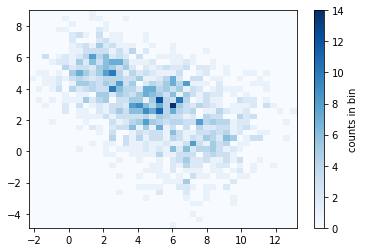

In [55]:
plt.hist2d(Dataset.X1, Dataset.X2, bins=40, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')


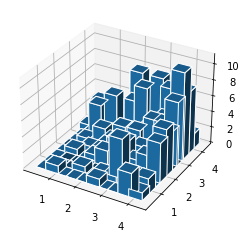

In [56]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
hist, xedges, yedges = np.histogram2d(Dataset.X1, Dataset.X2 , bins=10, range=[[0, 4], [0, 4]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average',edgecolor="white")

plt.show()

In [97]:
def histogram( Data, binvalue ):
    minimum1 = min(Data.X1)
    maximum1 = max(Data.X1)
    minimum2 = min(Data.X2)
    maximum2 = max(Data.X2)
    maximum = max(maximum1 , maximum2)
    minimum = min(minimum1 , minimum2)
    lenght = maximum - minimum
    Nbins = lenght / binvalue
    
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(projection='3d')
    hist, xedges, yedges = np.histogram2d(Data.X1, Data.X2 , bins=int(Nbins/3), range=[[0, 4], [0, 4]])

    # Construct arrays for the anchor positions of the 16 bars.
    xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
    xpos = xpos.ravel()
    ypos = ypos.ravel()
    zpos = 0

    # Construct arrays with the dimensions for the 16 bars.
    dx = dy = 0.5 * np.ones_like(zpos)
    dz = hist.ravel()

    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average' , edgecolor="white")
    plt.show()
    
    plt.figure(figsize=(8, 6))
    plt.hist(Data.X1, bins=np.arange(min(Data.X1), max(Data.X1) + binvalue, binvalue) , edgecolor="white")
    plt.ylabel('count')
    plt.xlabel('Data')
    plt.show()
    
    plt.figure(figsize=(8, 6))
    plt.hist(Data.X2, bins=np.arange(min(Data.X2), max(Data.X2) + binvalue, binvalue) , edgecolor="white")
    plt.ylabel('count')
    plt.xlabel('Data')
    plt.show()

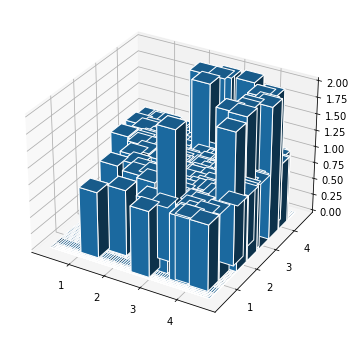

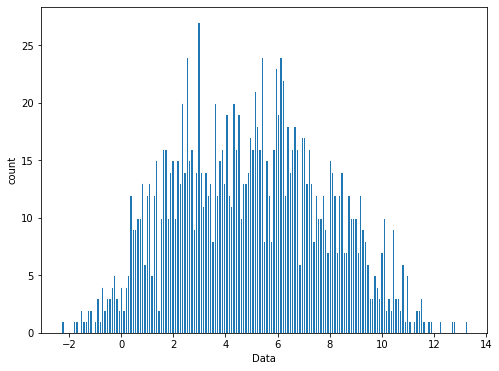

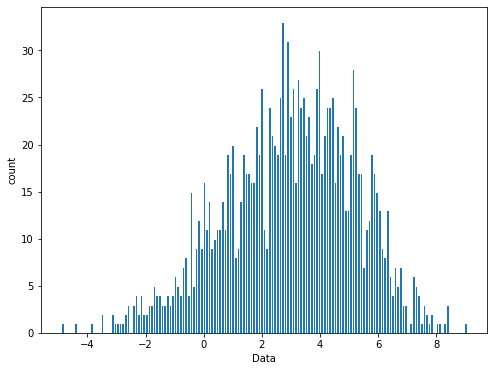

In [98]:

histogram(Dataset ,0.09)


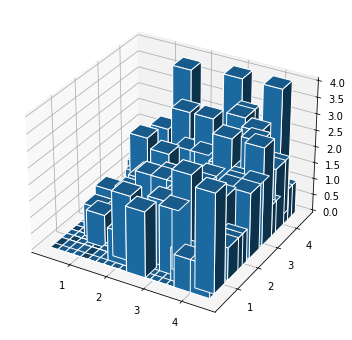

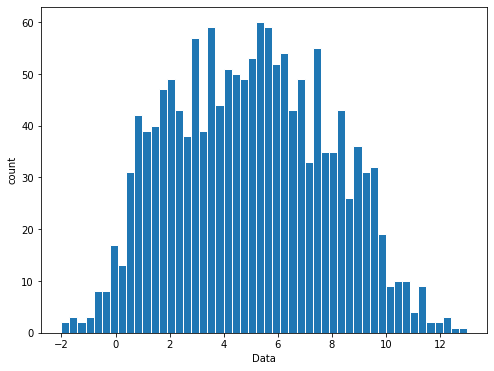

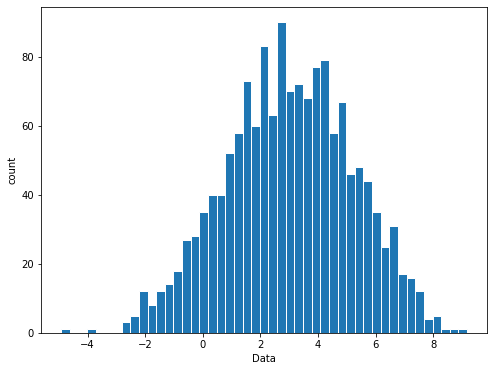

In [59]:
histogram(Dataset ,0.3)

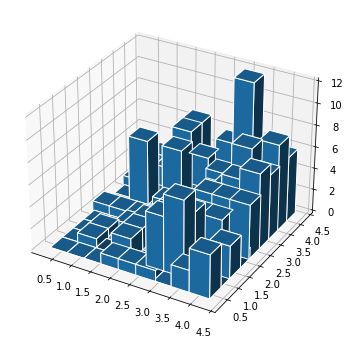

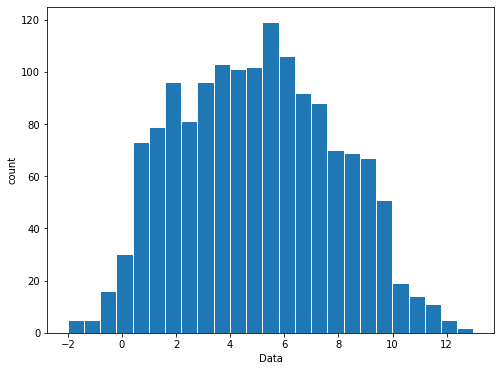

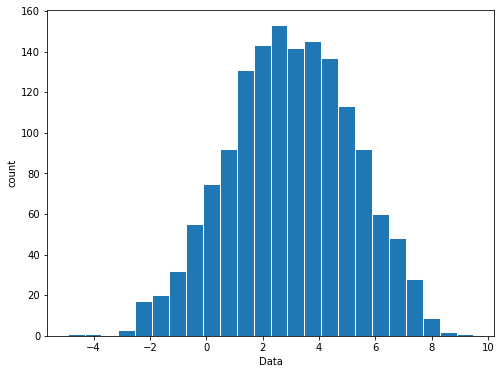

In [60]:
histogram(Dataset ,0.6)

In [61]:
#Histogram ends ::



#parzen Window Starts ::

In [62]:
dataset = np.array(Dataset)
dats = np.zeros((len(dataset),2))
for i in range(len(dataset)):
    dats[i][0] = dataset[i][0]
    dats[i][1] = dataset[i][1]

In [63]:
#defin gaussian function to calculate dist
def GaussianKernel(dbutaion, StandardDeviation):
    return (1/(math.sqrt(2*math.pi) * StandardDeviation)) * math.exp(-(dbutaion**2)/(2*StandardDeviation**2))


In [64]:

 #estimate the parzen windows decision boundray : 
def PrzenWindow(length, bw):
    if ((np.abs(length)) <= (np.abs(bw))):
        return 1
    else:
        return 0


In [65]:
#kernel estimation 
def EstKernel(data, lend , bw ,StanDev=-1):

    if(StanDev ==-1):
        lenght = len(data)
        count = 1
        for j in range(lenght):
            count = count * PrzenWindow((lend[j]-data[j]), bw)
        return count
    elif(StanDev != -1):
        lenght = len(data)
        count = 1
        for j in range(lenght):
            count = count* ( GaussianKernel((lend[j]-data[j])/bw, StanDev))

        
        return count
        
        

In [66]:

#calculate the probebilty of x 
def CalcProbebality(data, bw ,X,StanDev=-1):

    if(StanDev ==-1):
        prX= []
        N = data.shape[0]
        dim = data.shape[1]  
        for x in X:
            px = 1/N * 1/(bw**dim) * \
            np.sum([EstKernel(dataPoint, x, bw) \
                    for dataPoint in data])
            prX.append(px) 

        return prX
    elif(StanDev != -1): 
        N = X.shape[0]
        dim = data.shape[1]  
        prX = []

        for x in X:
            px = 1/N * 1/(bw**dim) * np.sum([EstKernel(dataPoint, x, bw, StanDev) for dataPoint in data])
            prX.append(px) 

        return prX

In [67]:
#prepare dataset to plot 

min0 = min(dataset[:, 0])
max0 = max(dataset[:, 0])
min1 = min(dataset[:, 1])
max1 = max(dataset[:, 1])
x = np.linspace(min0, max0).reshape(-1, 1)
y = np.linspace(min1, max1).reshape(-1, 1)
xx, yy = np.meshgrid(x, y)
secondX = np.concatenate( [xx.flatten().reshape(-1, 1), yy.flatten().reshape(-1, 1)], axis=1)
#secondXG = np.concatenate([xx.ravel().reshape(-1, 1), yy.ravel().reshape(-1, 1)], axis=1)


In [68]:
x1 = np.linspace(min0, max0,20).reshape(-1, 1)
y1 = np.linspace(min1, max1,20).reshape(-1, 1)
xx1, yy1 = np.meshgrid(x, y)
secondXG = np.concatenate([xx1.ravel().reshape(-1, 1), yy1.ravel().reshape(-1, 1)], axis=1)




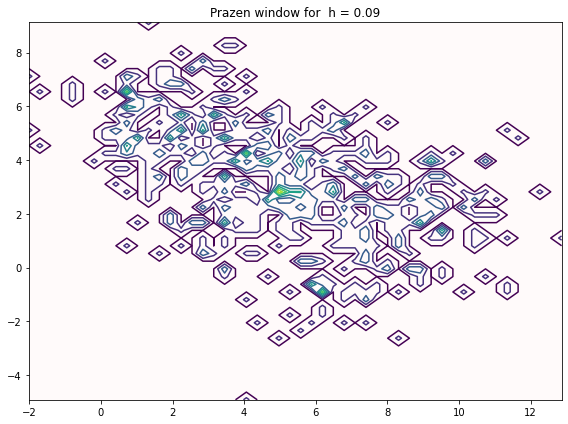

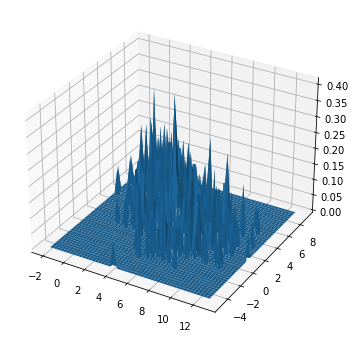

In [69]:
# plot for h = 0.09 
probebalities = []

prX = CalcProbebality(dats, 0.09,secondX)
count = np.array(prX).reshape(xx.shape)
probebalities.append(count)
fig, ax = plt.subplots(1,figsize=(8, 6))
ax.contour(xx, yy, probebalities[0])

ax.set_facecolor("snow")
ax.set_title('Prazen window for  h = 0.09')

fig.tight_layout()
plt.show()
plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, probebalities[0])
plt.show()




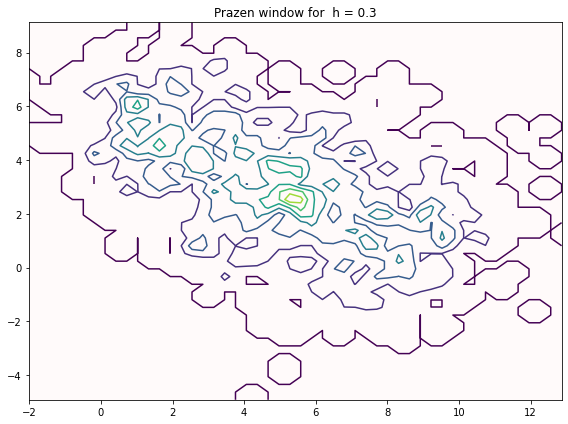

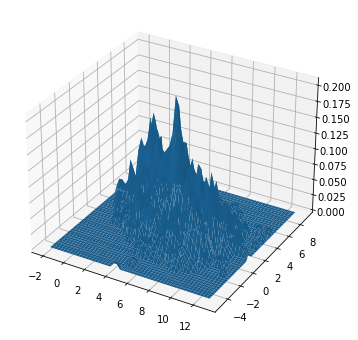

In [70]:
# plot for h = 0.3
probebalities = []

prX = CalcProbebality(dats, 0.3,secondX)
count = np.array(prX).reshape(xx.shape)
probebalities.append(count)
fig, ax = plt.subplots(1,figsize=(8, 6))
ax.contour(xx, yy, probebalities[0])

ax.set_facecolor("snow")
ax.set_title('Prazen window for  h = 0.3')
fig.tight_layout()
plt.show()
plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, probebalities[0])
plt.show()

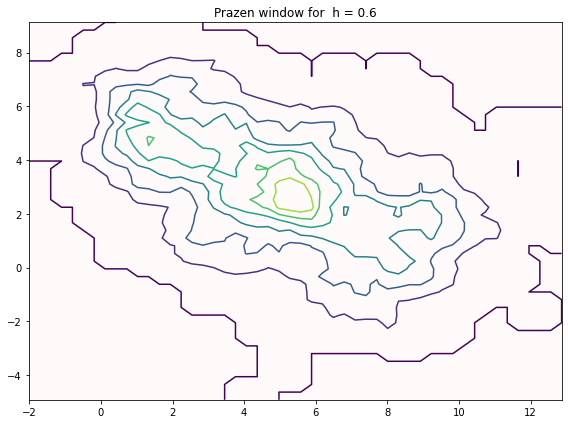

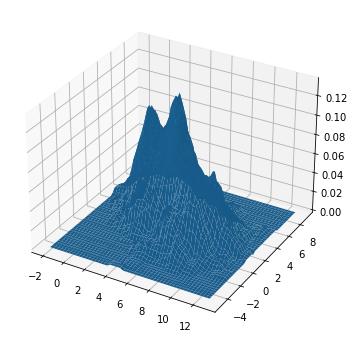

In [71]:

# plot for h = 0.6
probebalities = []

prX = CalcProbebality(dats, 0.6,secondX)
count = np.array(prX).reshape(xx.shape)
probebalities.append(count)
fig, ax = plt.subplots(1,figsize=(8, 6))
ax.contour(xx, yy, probebalities[0])
ax.set_facecolor("snow")
ax.set_title('Prazen window for  h = 0.6')
fig.tight_layout()
plt.show()
plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, probebalities[0])
plt.show()

In [72]:
#parzen Window Ends ::

#Gaussian kernel (Standard Deviations of 0.2,0.6,0.9)  Starts here ::


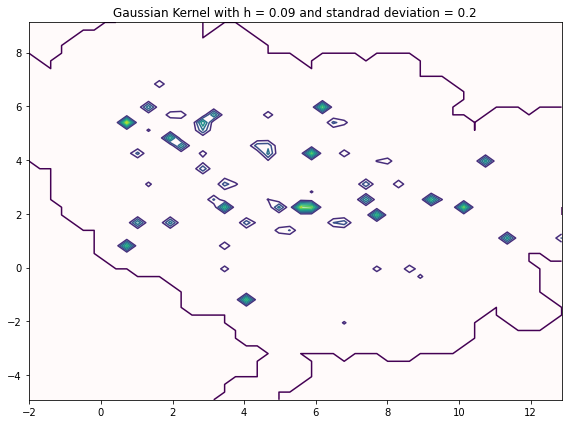

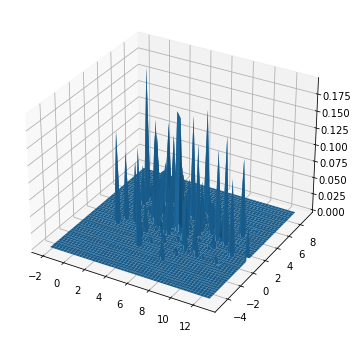

In [73]:
# plot for h = 0.09  and sigma 0.2
probebalities = []
probs = CalcProbebality(dats, 0.09, secondXG, 0.2)
count = np.array(probs).reshape(xx1.shape)
probebalities.append(count)


fig, ax = plt.subplots(1,figsize=(8, 6))
ax.contour(xx1, yy1, probebalities[0])
ax.set_facecolor("snow")
ax.set_title('Gaussian Kernel with h = 0.09 and standrad deviation = 0.2')
fig.tight_layout()
plt.show()
plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, probebalities[0])
plt.show()

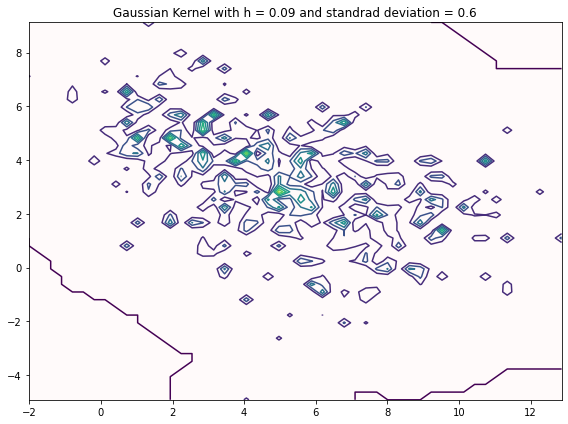

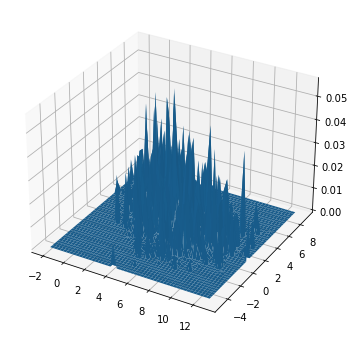

In [74]:
# plot for h = 0.09  and sigma 0.2
probebalities = []
probs = CalcProbebality(dats, 0.09, secondXG, 0.6)
count = np.array(probs).reshape(xx1.shape)
probebalities.append(count)


fig, ax = plt.subplots(1,figsize=(8, 6))
ax.contour(xx1, yy1, probebalities[0])
ax.set_facecolor("snow")
ax.set_title('Gaussian Kernel with h = 0.09 and standrad deviation = 0.6')
fig.tight_layout()
plt.show()
plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, probebalities[0])
plt.show()

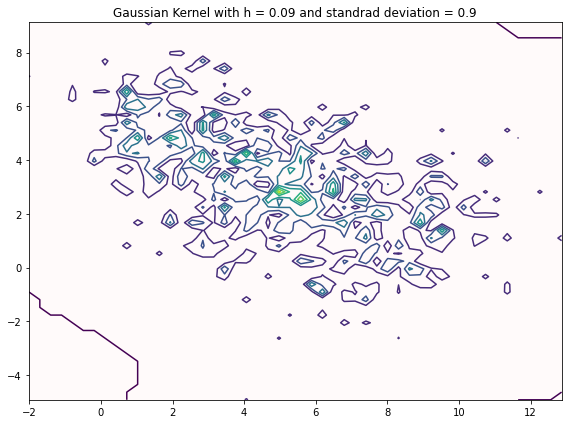

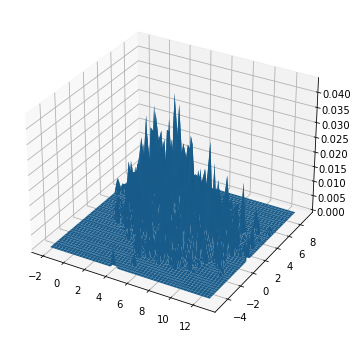

In [75]:
# plot for h = 0.09  and sigma 0.2
probebalities = []
probs = CalcProbebality(dats, 0.09, secondXG, 0.9)
count = np.array(probs).reshape(xx1.shape)
probebalities.append(count)


fig, ax = plt.subplots(1,figsize=(8, 6))
ax.contour(xx1, yy1, probebalities[0])
ax.set_facecolor("snow")
ax.set_title('Gaussian Kernel with h = 0.09 and standrad deviation = 0.9')
fig.tight_layout()
plt.show()
plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, probebalities[0])
plt.show()

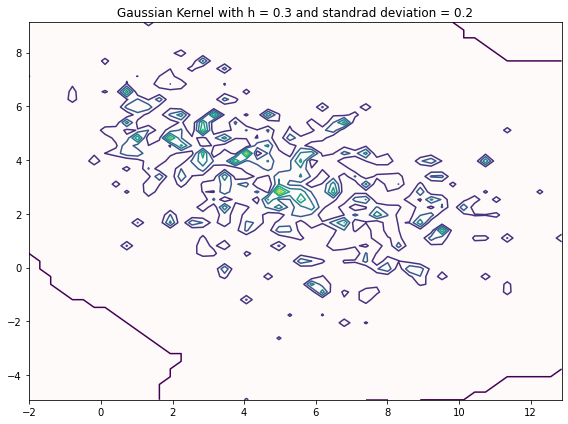

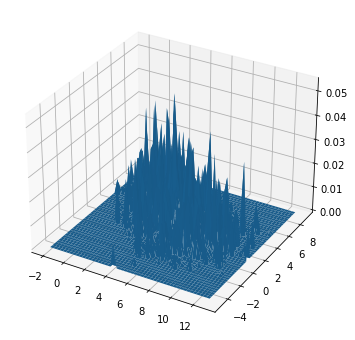

In [76]:
# plot for h = 0.3 and sigma 0.2
probebalities = []
probs = CalcProbebality(dats, 0.3, secondXG, 0.2)
count = np.array(probs).reshape(xx1.shape)
probebalities.append(count)


fig, ax = plt.subplots(1,figsize=(8, 6))
ax.contour(xx1, yy1, probebalities[0])
ax.set_facecolor("snow")
ax.set_title('Gaussian Kernel with h = 0.3 and standrad deviation = 0.2')
fig.tight_layout()
plt.show()
plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, probebalities[0])
plt.show()

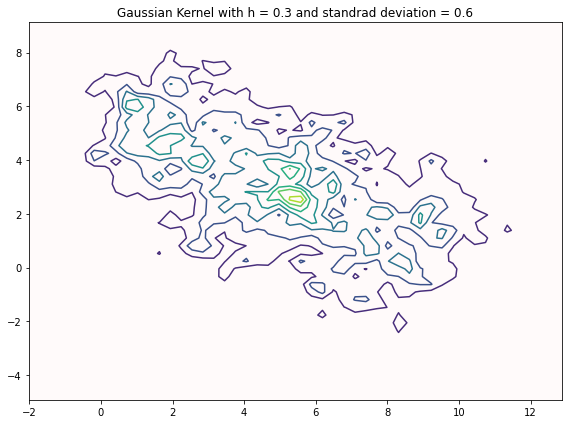

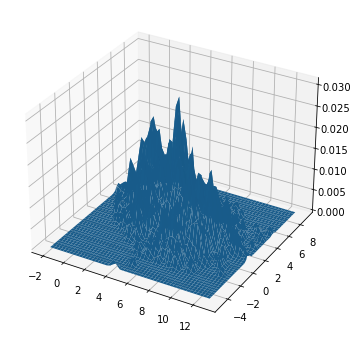

In [77]:
# plot for h = 0.3 and sigma 0.6
probebalities = []
probs = CalcProbebality(dats, 0.3, secondXG, 0.6)
count = np.array(probs).reshape(xx1.shape)
probebalities.append(count)


fig, ax = plt.subplots(1,figsize=(8, 6))
ax.contour(xx1, yy1, probebalities[0])
ax.set_facecolor("snow")
ax.set_title('Gaussian Kernel with h = 0.3 and standrad deviation = 0.6')
fig.tight_layout()
plt.show()
plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, probebalities[0])
plt.show()

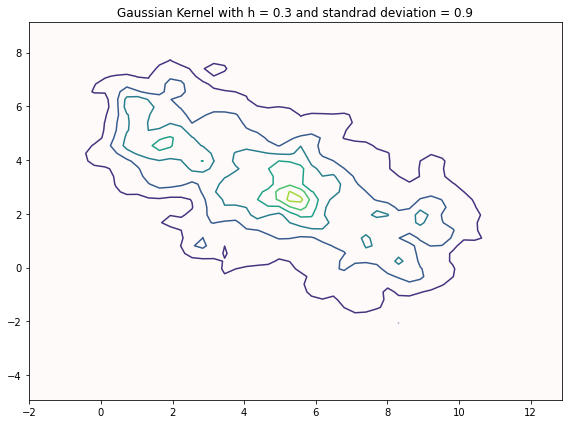

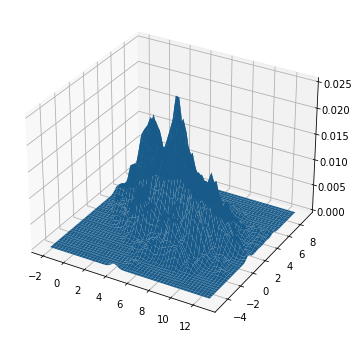

In [78]:
# plot for h = 0.3 and sigma 0.9
probebalities = []
probs = CalcProbebality(dats, 0.3, secondXG, 0.9)
count = np.array(probs).reshape(xx1.shape)
probebalities.append(count)


fig, ax = plt.subplots(1,figsize=(8, 6))
ax.contour(xx1, yy1, probebalities[0])
ax.set_facecolor("snow")
ax.set_title('Gaussian Kernel with h = 0.3 and standrad deviation = 0.9')
fig.tight_layout()
plt.show()
plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, probebalities[0])
plt.show()

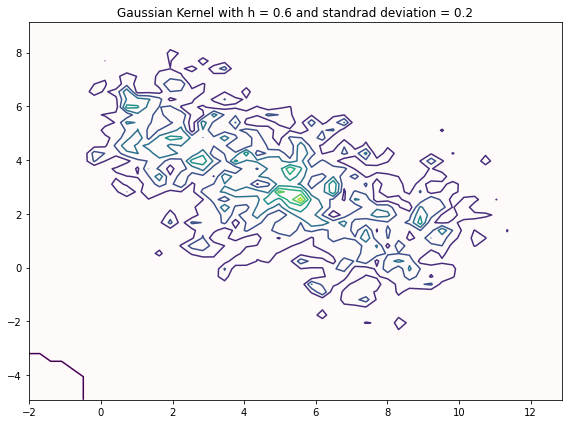

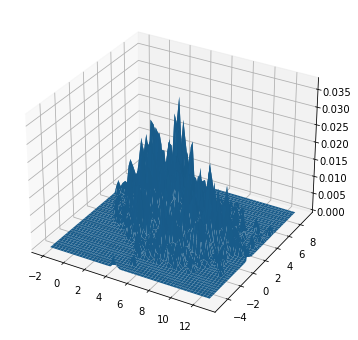

In [79]:
# plot for h = 0.6 and sigma 0.2
probebalities = []
probs = CalcProbebality(dats, 0.6, secondXG, 0.2)
count = np.array(probs).reshape(xx1.shape)
probebalities.append(count)


fig, ax = plt.subplots(1,figsize=(8, 6))
ax.contour(xx1, yy1, probebalities[0])
ax.set_facecolor("snow")
ax.set_title('Gaussian Kernel with h = 0.6 and standrad deviation = 0.2')
fig.tight_layout()
plt.show()
plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, probebalities[0])
plt.show()

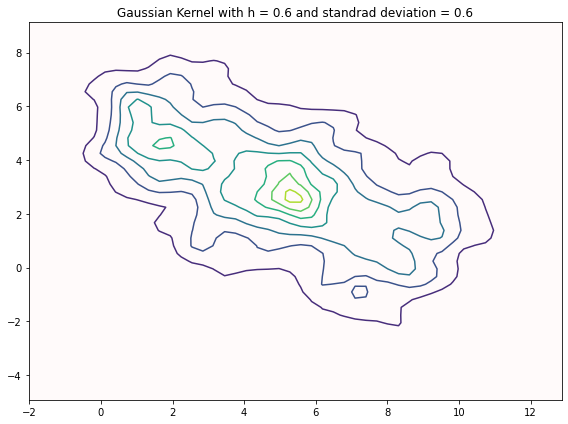

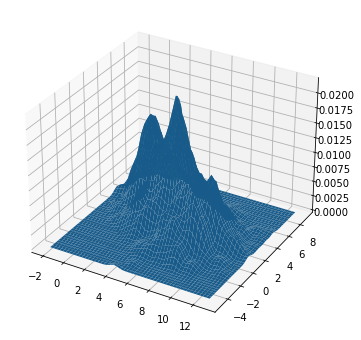

In [80]:
# plot for h = 0.6 and sigma 0.6
probebalities = []
probs = CalcProbebality(dats, 0.6, secondXG, 0.6)
count = np.array(probs).reshape(xx1.shape)
probebalities.append(count)


fig, ax = plt.subplots(1,figsize=(8, 6))
ax.contour(xx1, yy1, probebalities[0])
ax.set_facecolor("snow")
ax.set_title('Gaussian Kernel with h = 0.6 and standrad deviation = 0.6')
fig.tight_layout()
plt.show()
plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, probebalities[0])
plt.show()

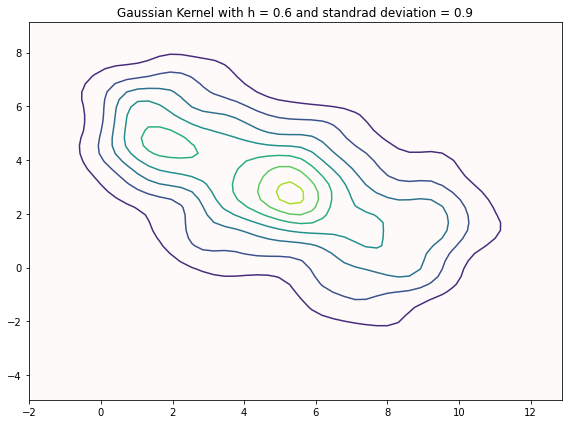

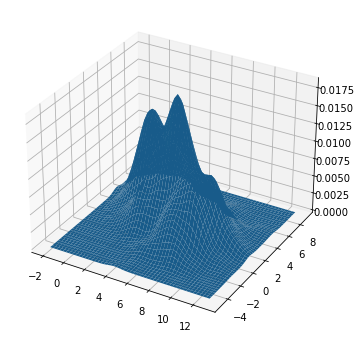

In [81]:
# plot for h = 0.6 and sigma 0.9
probebalities = []
probs = CalcProbebality(dats, 0.6, secondXG, 0.9)
count = np.array(probs).reshape(xx1.shape)
probebalities.append(count)


fig, ax = plt.subplots(1,figsize=(8, 6))
ax.contour(xx1, yy1, probebalities[0])
ax.set_facecolor("snow")
ax.set_title('Gaussian Kernel with h = 0.6 and standrad deviation = 0.9')
fig.tight_layout()
plt.show()
plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, probebalities[0])
plt.show()